# Name- Gaurang Sonkavde    M.Tech 1st Year

### Stock Market Prediction And Forecasting Using Stacked LSTM

### GitHub Link - https://github.com/Gaurang-Sonkavde/Crypto-Predictor

### Raw Data

In [2]:
### Data Collection
import os
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import datetime
import tensorflow as tf
from datetime import datetime
from datetime import date
import pandas as pd

In [3]:
os.chdir(r'C:\Users\gaura\Downloads')

In [4]:
dft= pd.read_csv('Binance Coin - Historic data.csv',)

In [5]:
dft.head()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2.26M,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2.86M,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83


In [6]:
dft.tail()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
1352,"Nov 13, 2017",1.68,1.49,1.74,1.49,166.01K,12.75
1353,"Nov 12, 2017",1.49,1.66,1.70,1.34,456.48K,-10.24
1354,"Nov 11, 2017",1.66,1.71,1.93,1.58,256.71K,-2.92
1355,"Nov 10, 2017",1.71,1.99,2.02,1.60,483.23K,-14.07
1356,"Nov 09, 2017",1.99,1.99,2.20,1.90,283.35K,0.00


In [7]:
dft

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2.26M,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2.86M,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83
...,...,...,...,...,...,...,...
1352,"Nov 13, 2017",1.68,1.49,1.74,1.49,166.01K,12.75
1353,"Nov 12, 2017",1.49,1.66,1.70,1.34,456.48K,-10.24
1354,"Nov 11, 2017",1.66,1.71,1.93,1.58,256.71K,-2.92
1355,"Nov 10, 2017",1.71,1.99,2.02,1.60,483.23K,-14.07


In [8]:
df1 = dft.set_index('Date')

In [9]:
df=df1.iloc[::-1]

In [10]:
df

,Price(in dollars),Open,High,Low,Vol.,Change%
Date,,,,,,
"Nov 09, 2017",1.99,1.99,2.20,1.90,283.35K,0.00
"Nov 10, 2017",1.71,1.99,2.02,1.60,483.23K,-14.07
"Nov 11, 2017",1.66,1.71,1.93,1.58,256.71K,-2.92
"Nov 12, 2017",1.49,1.66,1.70,1.34,456.48K,-10.24
"Nov 13, 2017",1.68,1.49,1.74,1.49,166.01K,12.75
...,...,...,...,...,...,...
"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83
"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19


In [11]:
df.describe()

,Price(in dollars),Open,High,Low,Change%
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,60.086728,59.867833,62.954245,56.603434,0.593206
std,121.888722,121.715871,128.359292,114.574371,6.841432
min,1.490000,1.490000,1.580000,1.340000,-44.080000
25%,12.090000,12.080000,12.440000,11.320000,-2.410000
50%,17.110000,17.080000,17.540000,16.440000,0.160000
75%,28.800000,28.770000,29.450000,27.830000,3.050000
max,676.560000,676.250000,690.870000,631.440000,69.990000


### Data Preprocessing

In [12]:
df.isna().any()

Price(in dollars)    False
Open                 False
High                 False
Low                  False
Vol.                 False
Change%              False
dtype: bool

In [13]:
df.isna().sum()

Price(in dollars)    0
Open                 0
High                 0
Low                  0
Vol.                 0
Change%              0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1357 entries, Nov 09, 2017 to Jul 27, 2021
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price(in dollars)  1357 non-null   float64
 1   Open               1357 non-null   float64
 2   High               1357 non-null   float64
 3   Low                1357 non-null   float64
 4   Vol.               1357 non-null   object 
 5   Change%            1357 non-null   float64
dtypes: float64(5), object(1)
memory usage: 74.2+ KB


In [15]:
df.describe()

,Price(in dollars),Open,High,Low,Change%
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,60.086728,59.867833,62.954245,56.603434,0.593206
std,121.888722,121.715871,128.359292,114.574371,6.841432
min,1.490000,1.490000,1.580000,1.340000,-44.080000
25%,12.090000,12.080000,12.440000,11.320000,-2.410000
50%,17.110000,17.080000,17.540000,16.440000,0.160000
75%,28.800000,28.770000,29.450000,27.830000,3.050000
max,676.560000,676.250000,690.870000,631.440000,69.990000


In [16]:
df.isna().sum()

Price(in dollars)    0
Open                 0
High                 0
Low                  0
Vol.                 0
Change%              0
dtype: int64

<AxesSubplot:xlabel='Date'>

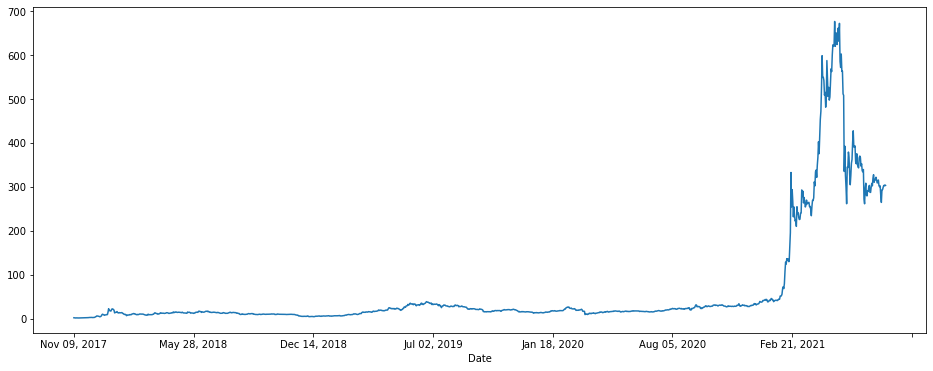

In [17]:
df['Price(in dollars)'].plot(figsize=(16,6))

In [18]:
df.shape

(1357, 6)

In [19]:
#7 Day Roll
df.rolling(7).mean().head(20)

,Price(in dollars),Open,High,Low,Change%
Date,,,,,
"Nov 09, 2017",NaN,NaN,NaN,NaN,NaN
"Nov 10, 2017",NaN,NaN,NaN,NaN,NaN
"Nov 11, 2017",NaN,NaN,NaN,NaN,NaN
"Nov 12, 2017",NaN,NaN,NaN,NaN,NaN
"Nov 13, 2017",NaN,NaN,NaN,NaN,NaN
"Nov 14, 2017",NaN,NaN,NaN,NaN,NaN
"Nov 15, 2017",1.667143,1.730000,1.858571,1.561429,-3.194286
"Nov 16, 2017",1.605714,1.667143,1.782857,1.505714,-3.101429
"Nov 17, 2017",1.575714,1.605714,1.720000,1.490000,-1.641429


<AxesSubplot:xlabel='Date'>

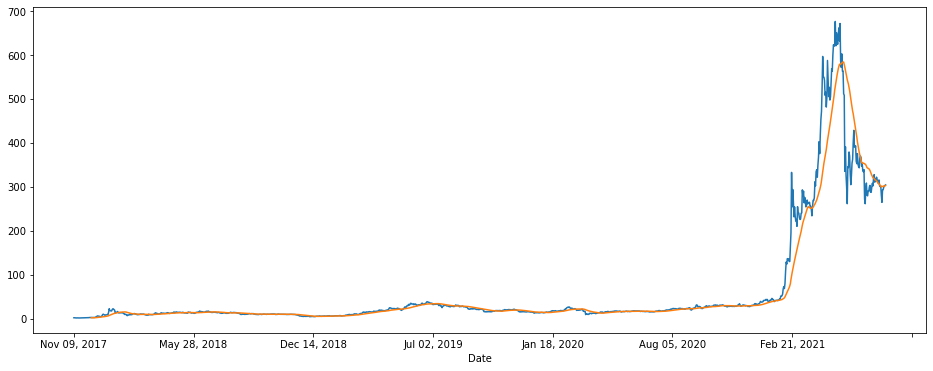

In [20]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Price(in dollars)'].plot()

<ipython-input-21-7e5fcb2963bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price(in dollars): 30 Day Mean'] = df['Price(in dollars)'].rolling(window=30).mean()


<AxesSubplot:xlabel='Date'>

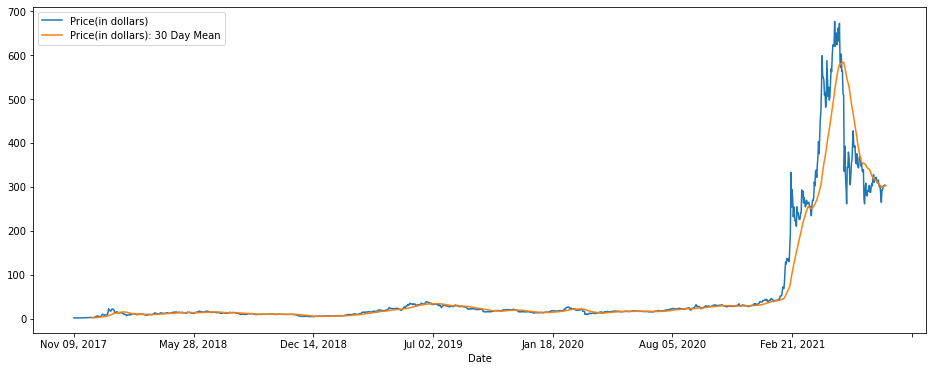

In [21]:
df['Price(in dollars): 30 Day Mean'] = df['Price(in dollars)'].rolling(window=30).mean()
df[['Price(in dollars)','Price(in dollars): 30 Day Mean']].plot(figsize=(16,6))

In [22]:
training_set=df['Price(in dollars)']
training_set=pd.DataFrame(training_set)

In [23]:
training_set

,Price(in dollars)
Date,
"Nov 09, 2017",1.99
"Nov 10, 2017",1.71
"Nov 11, 2017",1.66
"Nov 12, 2017",1.49
"Nov 13, 2017",1.68
...,...
"Jul 23, 2021",298.89
"Jul 24, 2021",303.15
"Jul 25, 2021",302.57


### Feature Extraction

In [24]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [25]:
#Feature Scalling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [26]:
# Creating a Data Structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(100,1356):
    X_train.append(training_set_scaled[i-100:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
    


In [27]:
X_train

array([[[7.40663931e-04],
        [3.25892130e-04],
        [2.51825737e-04],
        ...,
        [1.31393781e-02],
        [1.38948553e-02],
        [1.43836935e-02]],

       [[3.25892130e-04],
        [2.51825737e-04],
        [0.00000000e+00],
        ...,
        [1.38948553e-02],
        [1.43836935e-02],
        [1.50651044e-02]],

       [[2.51825737e-04],
        [0.00000000e+00],
        [2.81452294e-04],
        ...,
        [1.43836935e-02],
        [1.50651044e-02],
        [1.35541499e-02]],

       ...,

       [[8.01131734e-01],
        [7.51388745e-01],
        [7.60869243e-01],
        ...,
        [4.31940391e-01],
        [4.32606989e-01],
        [4.40546906e-01]],

       [[7.51388745e-01],
        [7.60869243e-01],
        [7.10933681e-01],
        ...,
        [4.32606989e-01],
        [4.40546906e-01],
        [4.46857363e-01]],

       [[7.60869243e-01],
        [7.10933681e-01],
        [7.44337624e-01],
        ...,
        [4.40546906e-01],
        [4.4685

In [28]:
y_train

array([0.0150651 , 0.01355415, 0.01417631, ..., 0.44685736, 0.44599819,
       0.4485757 ])

### Model Building

In [29]:
### Create the Stacked(one after another layer) LSTM model
from tensorflow.keras.models import Sequential ##Linear Stack of Layers
from tensorflow.keras.layers import Dense ##Deeply connected Neural Network Layer (Matrix Vector Multiplication)
from tensorflow.keras.layers import LSTM ## Long Short Term Memory
from keras.layers import Dropout

### Training Neural Network

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



In [31]:
#Compilation
model.compile(optimizer='adam' ,loss='mean_squared_error') #adam = Adaptive Movement Estimation

In [32]:
model.fit(X_train,y_train, epochs = 100, batch_size=32)

Epoch 1/100
40/40 [==============================] - 12s 130ms/step - loss: 0.0104
Epoch 2/100
40/40 [==============================] - 5s 124ms/step - loss: 0.0023
Epoch 3/100
40/40 [==============================] - 5s 121ms/step - loss: 0.0025
Epoch 4/100
40/40 [==============================] - 5s 121ms/step - loss: 0.0019
Epoch 5/100
40/40 [==============================] - 5s 118ms/step - loss: 0.0020
Epoch 6/100
40/40 [==============================] - 5s 129ms/step - loss: 0.0014
Epoch 7/100
40/40 [==============================] - 5s 121ms/step - loss: 0.0014
Epoch 8/100
40/40 [==============================] - 5s 115ms/step - loss: 0.0011
Epoch 9/100
40/40 [==============================] - 5s 116ms/step - loss: 0.0011
Epoch 10/100
40/40 [==============================] - 5s 114ms/step - loss: 0.0014
Epoch 11/100
40/40 [==============================] - 5s 114ms/step - loss: 7.9914e-04
Epoch 12/100
40/40 [==============================] - 5s 113ms/step - loss: 5.6537e-04
Epoc

In [33]:
dataset = pd.read_csv('Binance Coin - Historic data.csv',index_col="Date",parse_dates=True)

In [34]:
real_crypto_price = dataset.iloc[:,1:2].values

In [35]:
real_crypto_price

array([[304.31],
       [302.6 ],
       [302.55],
       ...,
       [  1.71],
       [  1.99],
       [  1.99]])

In [36]:
dataset_test=dataset.iloc[::-1]

In [37]:
dataset_test

,Price(in dollars),Open,High,Low,Vol.,Change%
Date,,,,,,
2017-11-09,1.99,1.99,2.20,1.90,283.35K,0.00
2017-11-10,1.71,1.99,2.02,1.60,483.23K,-14.07
2017-11-11,1.66,1.71,1.93,1.58,256.71K,-2.92
2017-11-12,1.49,1.66,1.70,1.34,456.48K,-10.24
2017-11-13,1.68,1.49,1.74,1.49,166.01K,12.75
...,...,...,...,...,...,...
2021-07-23,298.89,293.51,301.15,281.68,1.98M,1.83
2021-07-24,303.15,298.91,305.01,296.16,1.81M,1.42
2021-07-25,302.57,302.55,303.09,292.85,1.25M,-0.19


In [38]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1357 entries, 2017-11-09 to 2021-07-27
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price(in dollars)  1357 non-null   float64
 1   Open               1357 non-null   float64
 2   High               1357 non-null   float64
 3   Low                1357 non-null   float64
 4   Vol.               1357 non-null   object 
 5   Change%            1357 non-null   float64
dtypes: float64(5), object(1)
memory usage: 74.2+ KB


In [39]:
test_set=dataset_test['Price(in dollars)']
test_set=pd.DataFrame(test_set)

In [40]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1357 entries, 2017-11-09 to 2021-07-27
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price(in dollars)  1357 non-null   float64
dtypes: float64(1)
memory usage: 21.2 KB


### Prediction

In [41]:
##Getting Predicted Stock Price
dataset_total = pd.concat((df['Price(in dollars)'],dataset_test['Price(in dollars)']),axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
                   

2021-08-28 02:32:00.762 WARNING tensorflow: Model was constructed with shape (None, 100, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 100, 1), dtype=tf.float32, name='lstm_input'), name='lstm_input', description="created by layer 'lstm_input'"), but it was called on an input with incompatible shape (None, 60, 1).


In [42]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


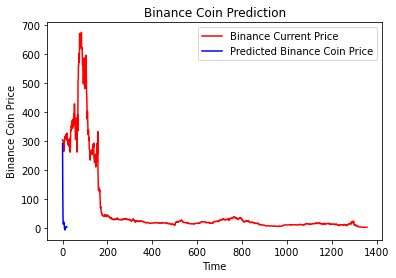

In [43]:
plt.plot(real_crypto_price, color ='red', label ='Binance Current Price')
plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted Binance Coin Price')
plt.title("Binance Coin Prediction")
plt.xlabel('Time')
plt.ylabel('Binance Coin Price')
plt.legend()
plt.show()

### Here I am done with Binance Coin Prediction using LSTM , I have also made this using FbProphet